# What Demographic Features Predict Violent Crime?

Sources:

California Violent Crime Rate 2000-2013 (by county) - https://data.ca.gov/dataset/violent-crime-rate

US Census Age & Sex Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-agesex-5yr.csv

US Census Racial Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-sexracehisp.csv

Data Dictionary for US Census Data - https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2000-2010/intercensal/county/

US Census Income by County 2010 - https://data.census.gov/cedsci/table?t=Income%20%28Households,%20Families,%20Individuals%29&g=0100000US%240500000&tid=ACSST1Y2019.S1901

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Set figure size for plots
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(13,10)})

# Violent Crime Data Import and EDA

In [4]:
#specify columns to import
violent_crime_cols = [
    'ind_definition',
    'reportyear', 
    'geotype', 
    'geoname', 
    'strata_level_name', 
    'numerator', 
    'denominator', 
    'rate', 
    'dof_population']

#read in data from Excel
violent_crime = pd.read_excel("hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx",sheet_name='ViolentCrime'
                              , usecols=violent_crime_cols)

In [5]:
#preview of data
violent_crime.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
0,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Aggravated assault,138325.0,33847694.0,NaN,33873086.0
1,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Forcible rape,9784.0,33847694.0,NaN,33873086.0
2,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Murder and non-negligent manslaughter,2079.0,33847694.0,NaN,33873086.0
3,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Robbery,60237.0,33847694.0,NaN,33873086.0
4,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Violent crime total,210448.0,33847694.0,6.217499,33873086.0


In [6]:
#Filter data
vc_filtered = violent_crime[(violent_crime.reportyear==2010.0) & (violent_crime.geotype == 'CO')]

In [7]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,NaN,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,NaN,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,NaN,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,NaN,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


In [8]:
#calculate the rate for each  type of crime
vc_filtered['rate'] = (vc_filtered['numerator'] / vc_filtered['denominator']) * 1000

#rename the rate column
vc_filtered.rename({'rate': 'rate_per_1000'}, axis=1, inplace=True)  # new method

In [9]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,3.272260,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,0.346958,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,0.087402,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,3.224587,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


### Distribution of violent crimes by county

<AxesSubplot:xlabel='rate_per_1000', ylabel='Count'>

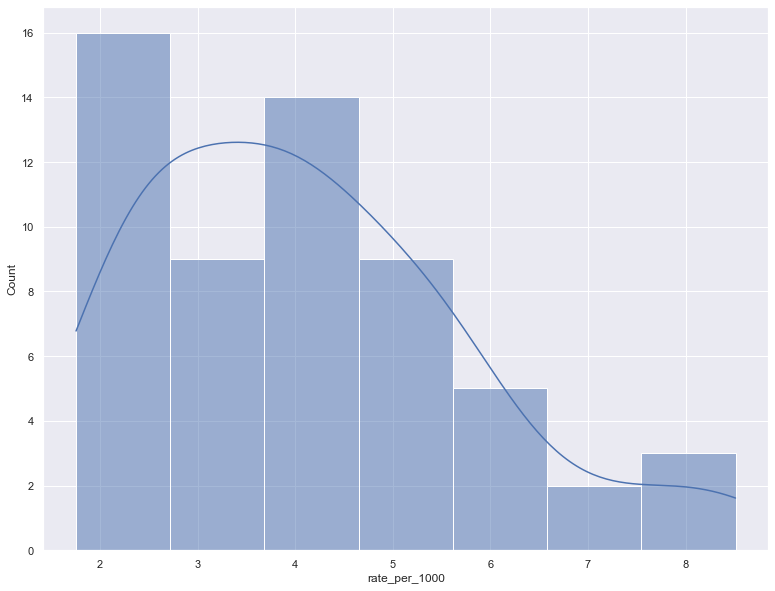

In [10]:
sns.histplot(vc_filtered[(vc_filtered.strata_level_name=='Violent crime total')]['rate_per_1000'], kde=True)

## What county has the highest violent crime rate?

In [11]:
vc_filtered[vc_filtered.rate_per_1000 == vc_filtered.rate_per_1000.max()]

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33924,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alpine,Violent crime total,10.0,1175.0,8.510638,1175.0


In [12]:
vc_categorical = vc_filtered[(vc_filtered.strata_level_name!='Violent crime total')]
vc_categorical = vc_categorical[['numerator','strata_level_name']]
vc_categorical = vc_categorical.groupby(['strata_level_name']).sum().reset_index()
vc_categorical.head()

,strata_level_name,numerator
0,Aggravated assault,95706.0
1,Forcible rape,8324.0
2,Murder and non-negligent manslaughter,1809.0
3,Robbery,58091.0


## What forms of violent crime were commited the most?

Text(0.5, 1.0, 'What violent crimes are most common?')

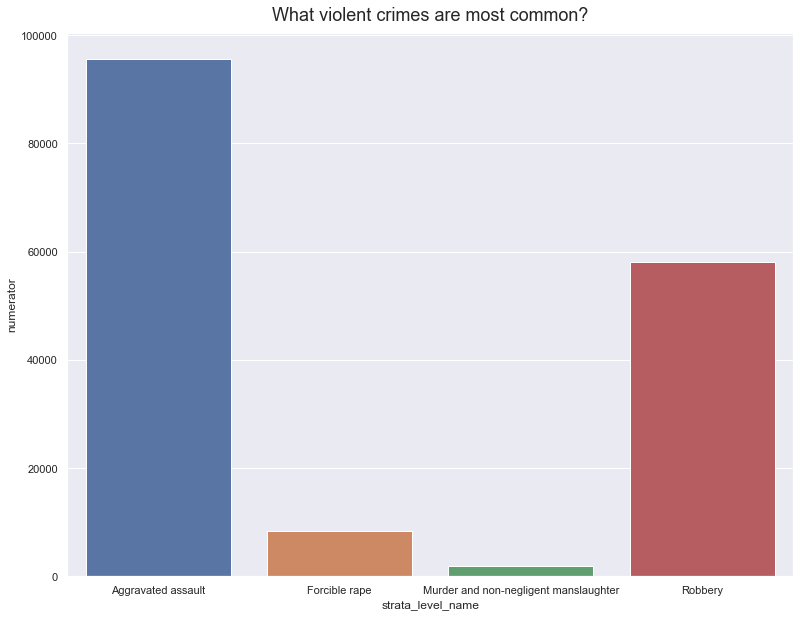

In [136]:
sns.barplot(x='strata_level_name', y='numerator'
            , data=vc_categorical).set_title('What violent crimes are most common?'
                                             , fontdict={'fontsize':18}, pad=12)

# Age and Sex Demographic Data Import and EDA

# Step 1 -  Age Data Analysis

#### The key for AGEGRP is as follows:
0 = Total  
1 = Age 0 to 4 years  
2 = Age 5 to 9 years  
3 = Age 10 to 14 years  
4 = Age 15 to 19 years  
5 = Age 20 to 24 years  
6 = Age 25 to 29 years  
7 = Age 30 to 34 years  
8 = Age 35 to 39 years   
9 = Age 40 to 44 years  
10 = Age 45 to 49 years  
11 = Age 50 to 54 years  
12 = Age 55 to 59 years  
13 = Age 60 to 64 years  
14 = Age 65 to 69 years  
15 = Age 70 to 74 years  
16 = Age 75 to 79 years  
17 = Age 80 to 84 years  
18 = Age 85 years and older  

In [14]:
age_sex_columns = [
    'STNAME',
    'CTYNAME',
    'AGEGRP',
    'SEX',
    'CENSUS2010POP'
]
age_sex = pd.read_csv('co-est00int-agesex-5yr.csv', usecols=age_sex_columns, encoding = "ISO-8859-1")

In [15]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
0,Alabama,Autauga County,0,0,54571.0
1,Alabama,Autauga County,0,1,3579.0
2,Alabama,Autauga County,0,2,3991.0
3,Alabama,Autauga County,0,3,4290.0
4,Alabama,Autauga County,0,4,4290.0


In [16]:
#Filter out all other states besides California
age_sex = age_sex[(age_sex.STNAME=='California')]

In [17]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
10602,California,Alameda County,0,0,1510271.0
10603,California,Alameda County,0,1,97652.0
10604,California,Alameda County,0,2,94546.0
10605,California,Alameda County,0,3,91070.0
10606,California,Alameda County,0,4,100394.0


In [18]:
#Clean up County Name
age_sex['NEW_CTY_NAME'] = age_sex['CTYNAME'].str.replace(' County', '')

In [19]:
#Filter out sex segregated rows, keep only age segregated data
age_only = age_sex[(age_sex.SEX==0) & (age_sex.AGEGRP > 0)]

In [20]:
age_only['TOTAL_POP'] = 0
for index,row in age_only.iterrows():
    #find total pop
    total_pop = age_sex[(age_sex.CTYNAME == row['CTYNAME']) & (age_sex.SEX == 0) & (age_sex.AGEGRP==0)]['CENSUS2010POP'].max()
    age_only.at[index, 'TOTAL_POP'] = total_pop
age_only['POP_PROPORTION'] = (age_only['CENSUS2010POP'] / age_only['TOTAL_POP'] * 100)

In [21]:
age_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP,POP_PROPORTION
10603,California,Alameda County,0,1,97652.0,Alameda,1510271,6.465859
10604,California,Alameda County,0,2,94546.0,Alameda,1510271,6.260201
10605,California,Alameda County,0,3,91070.0,Alameda,1510271,6.030044
10606,California,Alameda County,0,4,100394.0,Alameda,1510271,6.647416
10607,California,Alameda County,0,5,107049.0,Alameda,1510271,7.088066


In [22]:
older_population = age_only[['NEW_CTY_NAME', 'TOTAL_POP']]
older_population.rename({'NEW_CTY_NAME': 'CTYNAME'}, axis=1, inplace=True)
older_population.drop_duplicates(subset=['CTYNAME'], inplace=True)
older_population['ABOVE_50'] = 0

In [23]:
#population the ABOVE_50 column
for index, row in older_population.iterrows():
    county = row['CTYNAME']
    older_proportions = age_only[(age_only.NEW_CTY_NAME == county) & (age_only.AGEGRP >= 11)]['POP_PROPORTION']
    sum_proportions = older_proportions.sum()
    older_population.at[index, 'ABOVE_50'] = sum_proportions

In [24]:
older_population.head()

,CTYNAME,TOTAL_POP,ABOVE_50
10603,Alameda,1510271,29
10660,Alpine,1175,43
10717,Amador,38091,47
10774,Butte,220000,35
10831,Calaveras,45578,48


In [25]:
older_population['ABOVE_50'].describe()

count    58.000000
mean     33.775862
std       7.874104
min      22.000000
25%      27.250000
50%      31.500000
75%      39.000000
max      51.000000
Name: ABOVE_50, dtype: float64

### Older population distribution
**ABOVE_50** indicates the percentage of the population above 50 years old

<AxesSubplot:xlabel='ABOVE_50', ylabel='Count'>

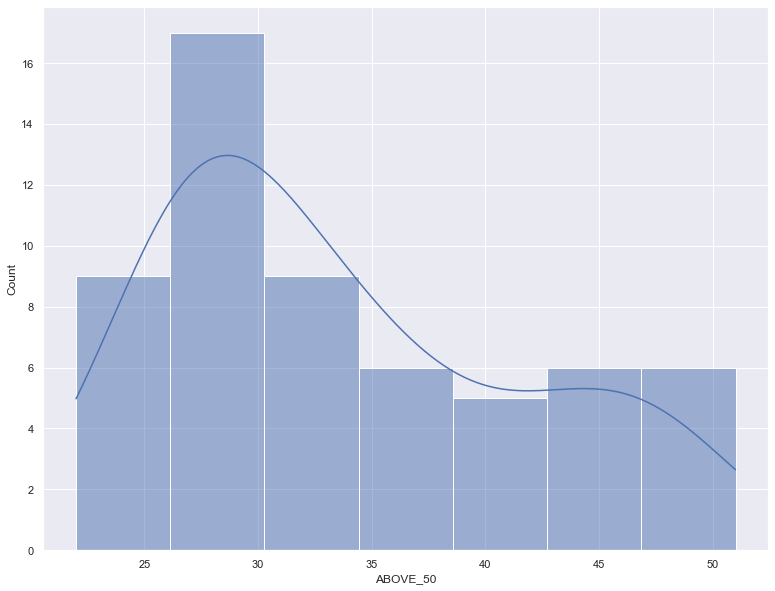

In [26]:
sns.histplot(older_population['ABOVE_50'], kde=True)

## What counties have the oldest populations?

**ABOVE_50** indicates the percentage of the population above 50 years old

In [27]:
older_population.nlargest(5, 'ABOVE_50')

,CTYNAME,TOTAL_POP,ABOVE_50
13168,Sierra,3240,51
12370,Plumas,20007,49
10831,Calaveras,45578,48
11800,Mariposa,18251,48
13567,Trinity,13786,48


In [28]:
#Let's join the older_population and violent crime dataframes
vc_total = vc_filtered[(vc_filtered.strata_level_name=='Violent crime total')]
vc_total.rename({'geoname': 'CTYNAME'}, axis=1, inplace=True)
age_vc = older_population.merge(vc_total, how='inner', on='CTYNAME')[['CTYNAME','rate_per_1000', 'ABOVE_50']]

In [29]:
age_vc.corr(method='pearson')

,rate_per_1000,ABOVE_50
rate_per_1000,1.000000,-0.163612
ABOVE_50,-0.163612,1.000000


## Do older populations have less violent crime?

[Text(0.5, 0, 'County Population Above 50 (%)'),
 Text(0, 0.5, 'Violent Crimes per 1000')]

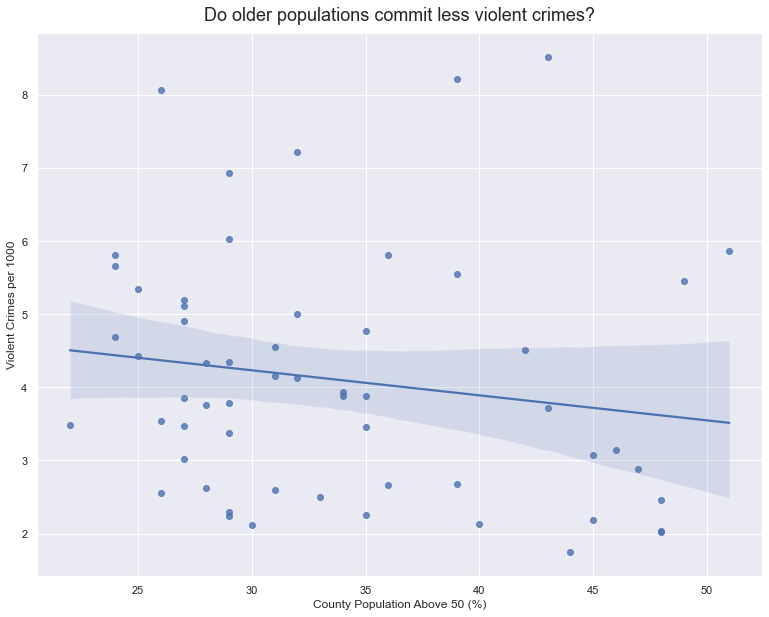

In [139]:
fig = sns.regplot(x='ABOVE_50', y='rate_per_1000', data=age_vc)
fig.set_title('Do older populations commit less violent crimes?', fontdict={'fontsize':18}, pad=12)
fig.set(xlabel='County Population Above 50 (%)', ylabel='Violent Crimes per 1000')

In [31]:
#Pivot table to get violent crime rate categorically data by each county
pivot_vc = vc_filtered[['strata_level_name','geoname','rate_per_1000']]
pivot_vc.rename({'geoname': 'CTYNAME'}, axis=1, inplace=True)
pivot_vc = pd.pivot_table(pivot_vc, index='CTYNAME', columns=['strata_level_name']).reset_index().dropna()
pivot_vc.head()

CTYNAME      rate_per_1000                \
strata_level_name               Aggravated assault Forcible rape   
0                       Alameda           3.272260      0.346958   
2                        Amador           2.284004      0.315035   
3                         Butte           2.300000      0.418182   
4                     Calaveras           1.470007      0.241345   
6                  Contra Costa           2.388885      0.180167   

                                                                   \
strata_level_name Murder and non-negligent manslaughter   Robbery   
0                                              0.087402  3.224587   
2                                              0.026253  0.262529   
3                                              0.031818  0.713636   
4                                              0.021940  0.307166   
6                                              0.061962  1.492815   

                                       
strata_level_name Violent crime total  
0                            6.931206  
2                            2.887821  
3                            3.463636  
4                            2.040458  
6                            4.123829

In [32]:
merge_vc_df = pivot_vc['rate_per_1000']
merge_vc_df['CTYNAME'] = pivot_vc['CTYNAME']

In [33]:
age_vc_categorical = older_population.merge(merge_vc_df, how='inner', on='CTYNAME')

In [34]:
age_vc_categorical.head()

,CTYNAME,TOTAL_POP,ABOVE_50,Aggravated assault,Forcible rape,Murder and non-negligent manslaughter,Robbery,Violent crime total
0,Alameda,1510271,29,3.272260,0.346958,0.087402,3.224587,6.931206
1,Amador,38091,47,2.284004,0.315035,0.026253,0.262529,2.887821
2,Butte,220000,35,2.300000,0.418182,0.031818,0.713636,3.463636
3,Calaveras,45578,48,1.470007,0.241345,0.021940,0.307166,2.040458
4,Contra Costa,1049025,32,2.388885,0.180167,0.061962,1.492815,4.123829


### Correlation between proportion of population above 50 and categorical violent crime rates

In [35]:
age_vc_categorical.corr()

,TOTAL_POP,ABOVE_50,Aggravated assault,Forcible rape,Murder and non-negligent manslaughter,Robbery,Violent crime total
TOTAL_POP,1.000000,-0.278878,-0.109679,-0.219066,0.117412,0.381168,0.094848
ABOVE_50,-0.278878,1.000000,-0.129614,0.273936,-0.403713,-0.409066,-0.281172
Aggravated assault,-0.109679,-0.129614,1.000000,0.291590,0.332134,0.240911,0.874392
Forcible rape,-0.219066,0.273936,0.291590,1.000000,0.209254,-0.155783,0.227730
Murder and non-negligent manslaughter,0.117412,-0.403713,0.332134,0.209254,1.000000,0.576893,0.567262
Robbery,0.381168,-0.409066,0.240911,-0.155783,0.576893,1.000000,0.673164
Violent crime total,0.094848,-0.281172,0.874392,0.227730,0.567262,0.673164,1.000000


## Does a population's age affect the types of violent crimes committed?

<AxesSubplot:xlabel='ABOVE_50', ylabel='Murder and non-negligent manslaughter'>

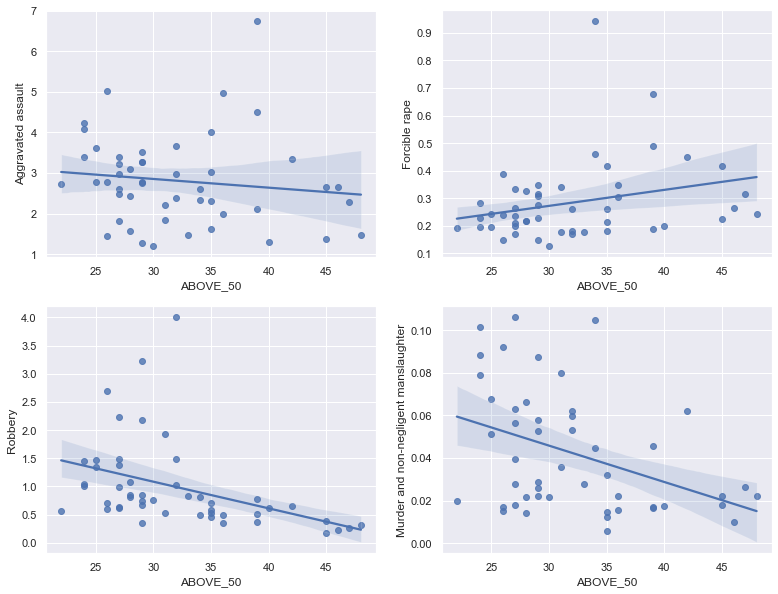

In [149]:
#Set figure to display four plots
fig, axs = plt.subplots(ncols=2,nrows=2)
#Make subplots
sns.regplot(x='ABOVE_50', y='Aggravated assault', data=age_vc_categorical, ax=axs[0][0])
sns.regplot(x='ABOVE_50', y='Forcible rape', data=age_vc_categorical, ax=axs[0][1])
sns.regplot(x='ABOVE_50', y='Robbery', data=age_vc_categorical, ax=axs[1][0])
sns.regplot(x='ABOVE_50', y='Murder and non-negligent manslaughter', data=age_vc_categorical, ax=axs[1][1])

# Step 2 - Sex Data Analysis

#### The key for SEX is as follows:
0 = Total  
1 = Male  
2 = Female   

In [37]:
#Filter out age segregated rows, keep only sex segregated data
sex_only = age_sex[(age_sex.AGEGRP==0) & (age_sex.SEX > 0)]

In [38]:
sex_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME
10621,California,Alameda County,1,0,740573.0,Alameda
10640,California,Alameda County,2,0,769698.0,Alameda
10678,California,Alpine County,1,0,606.0,Alpine
10697,California,Alpine County,2,0,569.0,Alpine
10735,California,Amador County,1,0,20749.0,Amador


In [39]:
#Add total population column
sex_only['TOTAL_POP'] = 0

In [40]:
#Populate the TOTAL_POP column
for index,row in sex_only.iterrows():
    #find total pop
    total_pop = age_sex[(age_sex.CTYNAME == row['CTYNAME']) & (age_sex.SEX == 0) & (age_sex.AGEGRP==0)]['CENSUS2010POP'].max()
    sex_only.at[index, 'TOTAL_POP'] = total_pop

#add population proportion column for the % of the population for each sex
sex_only['POP_PROPORTION'] = (sex_only['CENSUS2010POP'] / sex_only['TOTAL_POP'] * 100)
sex_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP,POP_PROPORTION
10621,California,Alameda County,1,0,740573.0,Alameda,1510271,49.035769
10640,California,Alameda County,2,0,769698.0,Alameda,1510271,50.964231
10678,California,Alpine County,1,0,606.0,Alpine,1175,51.574468
10697,California,Alpine County,2,0,569.0,Alpine,1175,48.425532
10735,California,Amador County,1,0,20749.0,Amador,38091,54.472185


## What counties have the lowest proportions of females?

In [41]:
female_only = sex_only[(sex_only.SEX == 2)]
female_only.drop(['CTYNAME'], axis=1, inplace=True)
female_only.rename({'POP_PROPORTION': 'Percentage Female', 'NEW_CTY_NAME':'CTYNAME'}, axis=1, inplace=True)
female_only.nsmallest(5, 'Percentage Female')

,STNAME,SEX,AGEGRP,CENSUS2010POP,CTYNAME,TOTAL_POP,Percentage Female
11609,California,2,0,12479.0,Lassen,34895,35.761570
11495,California,2,0,66638.0,Kings,152982,43.559373
11039,California,2,0,12703.0,Del Norte,28610,44.400559
10754,California,2,0,17342.0,Amador,38091,45.527815
12065,California,2,0,6654.0,Mono,14202,46.852556


In [42]:
#merge with violent crime pivot table
sex_vc = female_only.merge(merge_vc_df, how='inner', on='CTYNAME')

In [43]:
sex_vc.head()

,STNAME,SEX,AGEGRP,CENSUS2010POP,CTYNAME,TOTAL_POP,Percentage Female,Aggravated assault,Forcible rape,Murder and non-negligent manslaughter,Robbery,Violent crime total
0,California,2,0,769698.0,Alameda,1510271,50.964231,3.272260,0.346958,0.087402,3.224587,6.931206
1,California,2,0,17342.0,Amador,38091,45.527815,2.284004,0.315035,0.026253,0.262529,2.887821
2,California,2,0,111069.0,Butte,220000,50.485909,2.300000,0.418182,0.031818,0.713636,3.463636
3,California,2,0,22756.0,Calaveras,45578,49.927597,1.470007,0.241345,0.021940,0.307166,2.040458
4,California,2,0,537499.0,Contra Costa,1049025,51.237959,2.388885,0.180167,0.061962,1.492815,4.123829


<AxesSubplot:xlabel='Percentage Female', ylabel='Count'>

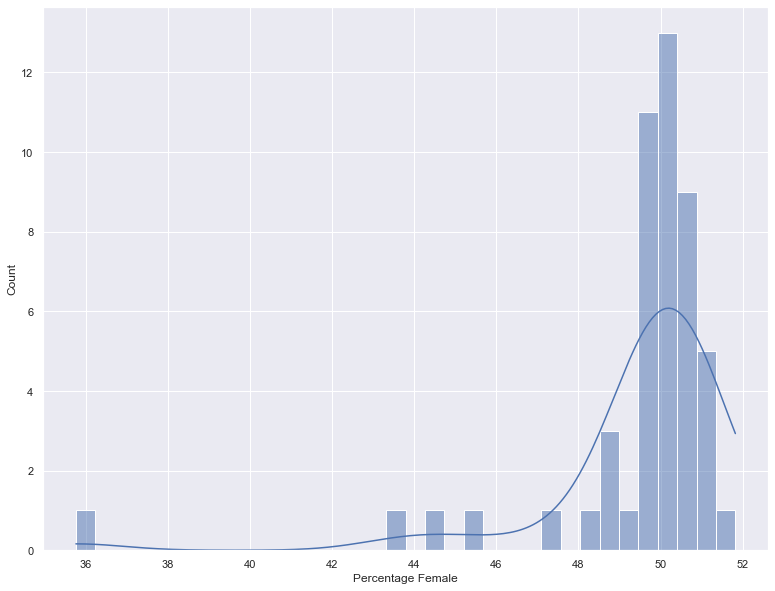

In [44]:
sns.histplot(sex_vc['Percentage Female'], kde=True)

In [45]:
sex_vc['Percentage Female'].describe()

count    49.000000
mean     49.459277
std       2.553225
min      35.761570
25%      49.671414
50%      50.060813
75%      50.542682
max      51.823153
Name: Percentage Female, dtype: float64

## Do populations with more females have less crime?

<AxesSubplot:xlabel='Percentage Female', ylabel='Violent crime total'>

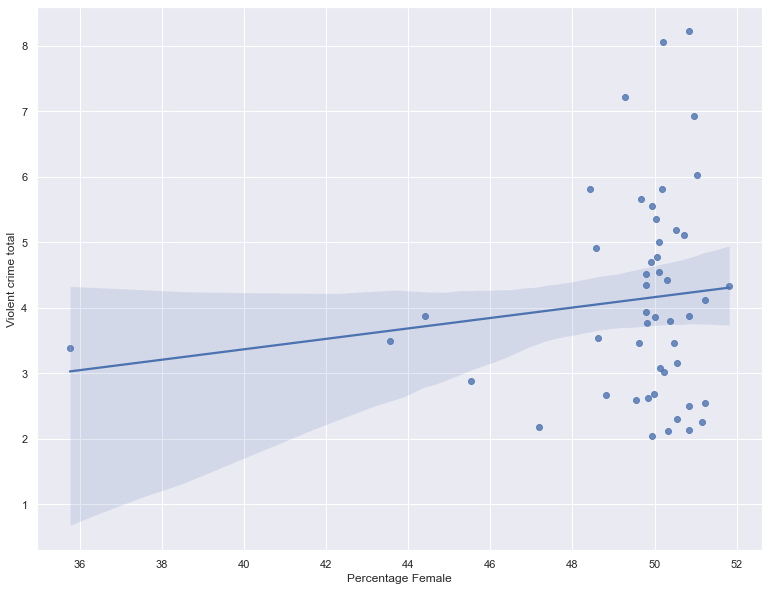

In [46]:
sns.regplot(x='Percentage Female', y='Violent crime total', data=sex_vc)

## How about the types of violent crimes commited?

<AxesSubplot:xlabel='Percentage Female', ylabel='Murder and non-negligent manslaughter'>

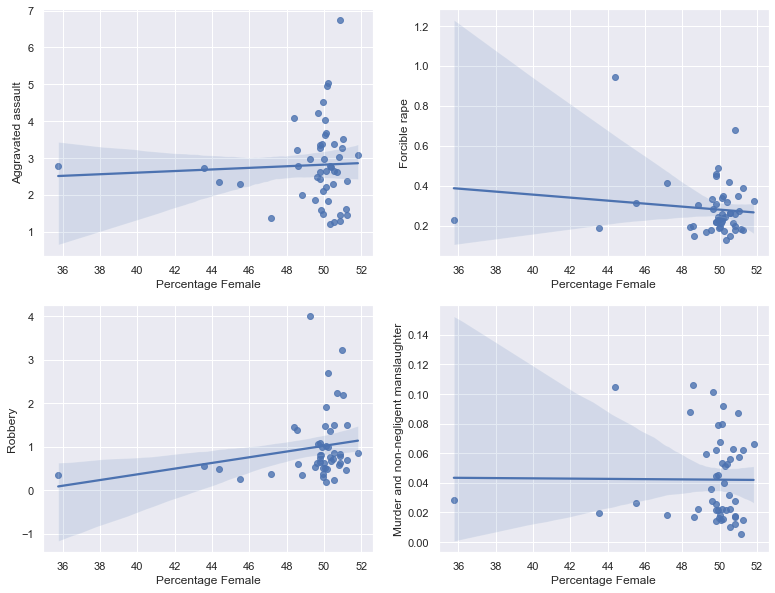

In [47]:
#Set figure to display four plots
fig, axs = plt.subplots(ncols=2,nrows=2)
#Make subplots
sns.regplot(x='Percentage Female', y='Aggravated assault', data=sex_vc, ax=axs[0][0])
sns.regplot(x='Percentage Female', y='Forcible rape', data=sex_vc, ax=axs[0][1])
sns.regplot(x='Percentage Female', y='Robbery', data=sex_vc, ax=axs[1][0])
sns.regplot(x='Percentage Female', y='Murder and non-negligent manslaughter', data=sex_vc, ax=axs[1][1])

# Household Income Data Import and EDA

In [48]:
income_cols = [
    'Households!!Estimate!!Median income (dollars)',
    'Households!!Estimate!!Mean income (dollars)',
    'Geographic Area Name'
]
household_income = pd.read_csv('ACSST1Y2010.S1901_data_with_overlays_2022-03-01T113916.csv',
                               header=1, usecols=income_cols)

#rename columns to more readable names
income_rename = {
    'Households!!Estimate!!Median income (dollars)': 'Median Household Income',
    'Households!!Estimate!!Mean income (dollars)' : 'Mean Household Income',
    'Geographic Area Name': 'geoname'
}
household_income.rename(income_rename, axis=1, inplace=True)

In [49]:
household_income.head()

,Median Household Income,Mean Household Income,geoname
0,47502,64806,"Baldwin County, Alabama"
1,36675,48098,"Calhoun County, Alabama"
2,35786,47449,"Cullman County, Alabama"
3,35967,50031,"DeKalb County, Alabama"
4,52222,65099,"Elmore County, Alabama"


### Data Cleanup

In [50]:
#drop all data not related to Californian counties
household_income = household_income[(household_income['geoname'].str.contains('California'))]
#create a new column with just the county
household_income['CTYNAME'] = household_income['geoname'].str.replace(' County, California', '')

In [51]:
household_income.head()

,Median Household Income,Mean Household Income,geoname,CTYNAME
45,67169,88659,"Alameda County, California",Alameda
46,41657,55215,"Butte County, California",Butte
47,73721,98124,"Contra Costa County, California",Contra Costa
48,66129,86222,"El Dorado County, California",El Dorado
49,45221,59964,"Fresno County, California",Fresno


## Median Household Income Distribution

<AxesSubplot:xlabel='Median Household Income', ylabel='Count'>

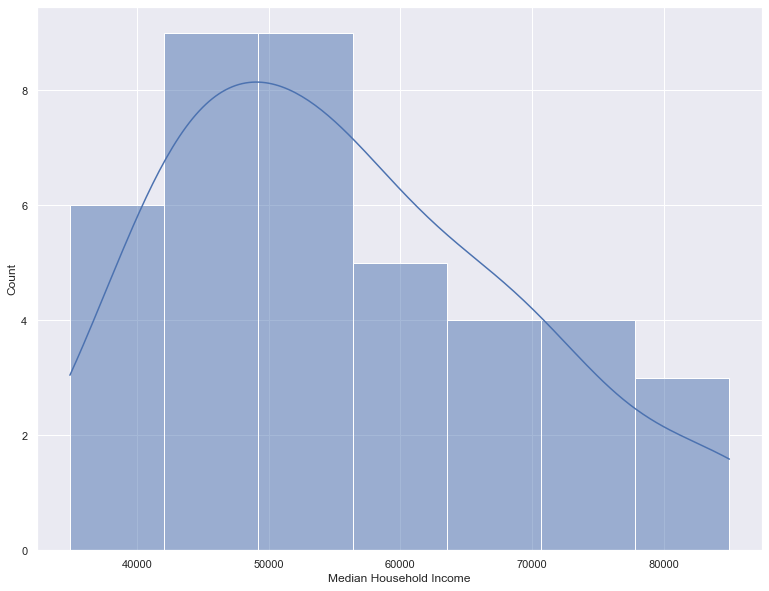

In [52]:
sns.histplot(household_income['Median Household Income'], kde=True)

## Mean Household Income Distribution 

<AxesSubplot:xlabel='Mean Household Income', ylabel='Count'>

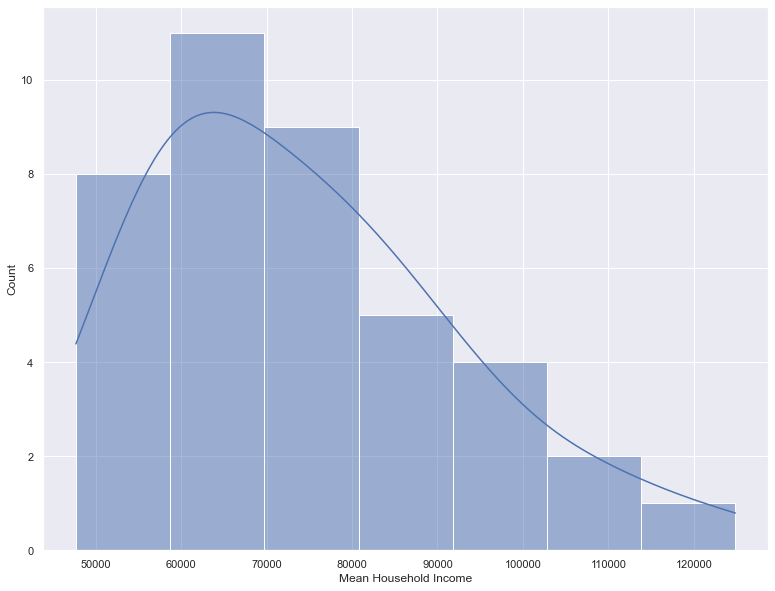

In [53]:
sns.histplot(household_income['Mean Household Income'], kde=True)

## What counties have the highest mean household income?

In [54]:
household_income.nlargest(5, 'Mean Household Income')

,Median Household Income,Mean Household Income,geoname,CTYNAME
57,83867,124863,"Marin County, California",Marin
72,82748,111591,"San Mateo County, California",San Mateo
74,85002,109698,"Santa Clara County, California",Santa Clara
69,71745,100785,"San Francisco County, California",San Francisco
47,73721,98124,"Contra Costa County, California",Contra Costa


## How does mean income affect the violent crime rate?

<AxesSubplot:xlabel='Mean Household Income', ylabel='Violent crime total'>

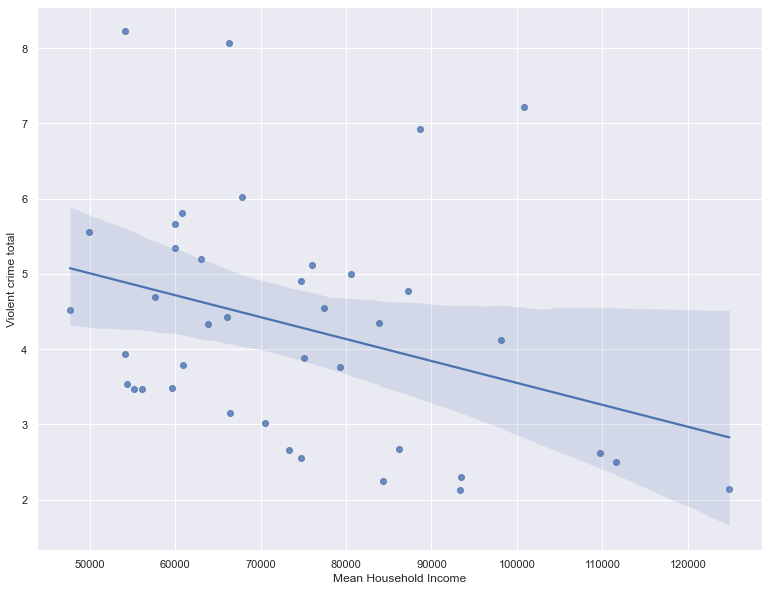

In [127]:
vc_income = household_income.merge(merge_vc_df, how='inner', on='CTYNAME')
sns.regplot(x='Mean Household Income', y='Violent crime total', data=vc_income)

## Does the average household income affect the types of violent crimes commited?

Text(0.5, 1.0, 'Household Income and Violent Crime Correlation Heatmap')

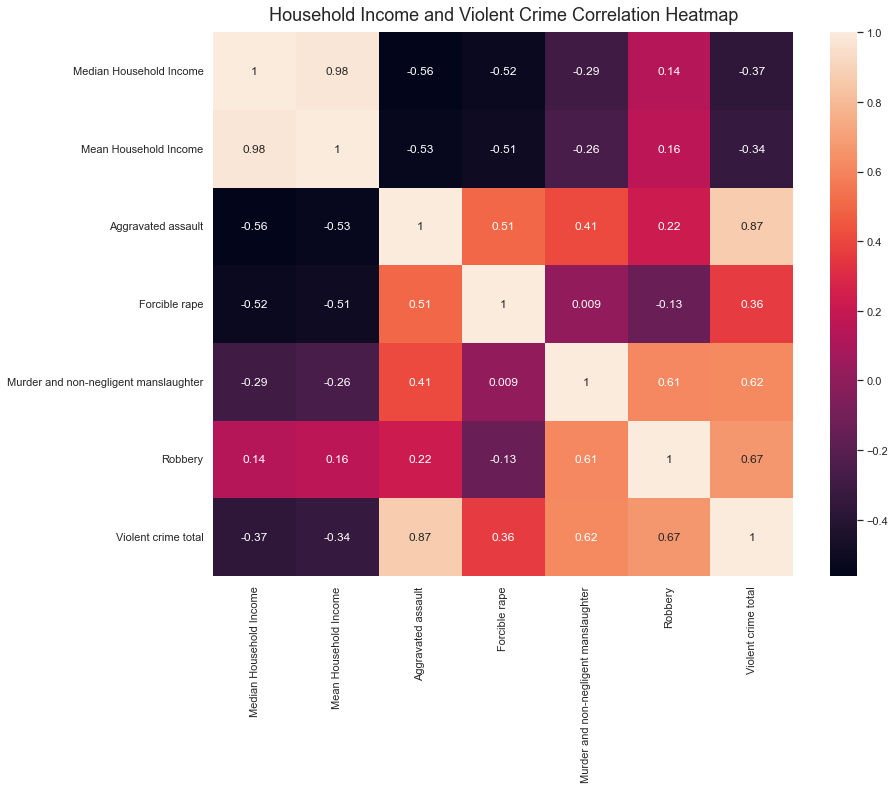

In [128]:
sns.heatmap(vc_income.corr(),annot=True).set_title(
    'Household Income and Violent Crime Correlation Heatmap'
    , fontdict={'fontsize':18}
    , pad=12)

<AxesSubplot:xlabel='Mean Household Income', ylabel='Murder and non-negligent manslaughter'>

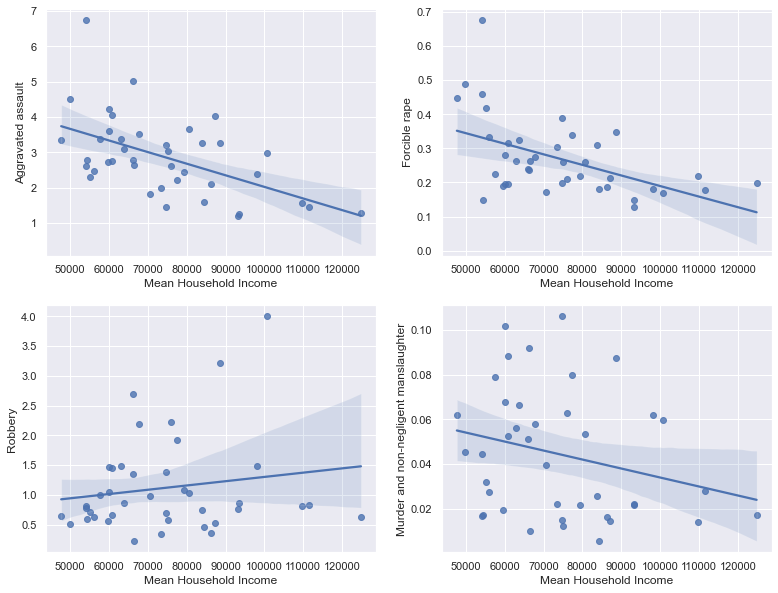

In [57]:
#Set figure to display four plots
fig, axs = plt.subplots(ncols=2,nrows=2)
#Make subplots
sns.regplot(x='Mean Household Income', y='Aggravated assault', data=vc_income, ax=axs[0][0])
sns.regplot(x='Mean Household Income', y='Forcible rape', data=vc_income, ax=axs[0][1])
sns.regplot(x='Mean Household Income', y='Robbery', data=vc_income, ax=axs[1][0])
sns.regplot(x='Mean Household Income', y='Murder and non-negligent manslaughter', data=vc_income, ax=axs[1][1])

# Racial Data Import and EDA 


In [69]:
race_cols = [
    'CTYNAME',
    'SEX',
    'ORIGIN',
    'CENSUS2010POP',
    'RACE',
    'STNAME'
]
race = pd.read_csv('co-est00int-sexracehisp.csv', usecols=race_cols, encoding = "ISO-8859-1")

In [76]:
#remove sex segregation
race = race[(race.SEX == 0)]

#remove rows not relating to California
race = race[(race.STNAME == 'California')]

In [77]:
#add total population column
race['TOTAL_POP'] = 0

#populate total population column
for index,row in race.iterrows():
    #find total pop
    total_pop = race[(race.CTYNAME == row['CTYNAME']) & (race.ORIGIN == 0) & (race.RACE==0)]['CENSUS2010POP'].max()
    race.at[index, 'TOTAL_POP'] = total_pop

#fix county name
race['CTYNAME'] = race['CTYNAME'].str.replace(' County', '')
race.head()

,STNAME,CTYNAME,SEX,ORIGIN,RACE,CENSUS2010POP,TOTAL_POP
11718,California,Alameda,0,0,0,1510271,1510271
11719,California,Alameda,0,0,1,799607,1510271
11720,California,Alameda,0,0,2,199315,1510271
11721,California,Alameda,0,0,3,17735,1510271
11722,California,Alameda,0,0,4,403695,1510271


In [84]:
#remove segregation by ORIGIN and only include distinct races
race_only = race[(race.ORIGIN == 0) & (race.RACE > 0)]
race_only.drop(['SEX', 'STNAME', 'ORIGIN'], axis=1, inplace=True)

In [88]:
#create new column to find the proportion of the population for each race
race_only['PERCENT_POPULATION'] = race_only['CENSUS2010POP'] / race_only['TOTAL_POP']

#drop the Total population and Census population columns
race_only.drop(['TOTAL_POP', 'CENSUS2010POP'], axis=1, inplace=True)
race_only.head()

,CTYNAME,RACE,PERCENT_POPULATION
11719,Alameda,1,0.529446
11720,Alameda,2,0.131973
11721,Alameda,3,0.011743
11722,Alameda,4,0.267300
11723,Alameda,5,0.009775


In [91]:
#pivot race_only table to get the Race in its own column
race_pivot = pd.pivot_table(race_only, index=['CTYNAME'], columns=['RACE']).reset_index().dropna()
race_pivot.head()

CTYNAME PERCENT_POPULATION                                          \
RACE                             1         2         3         4         5   
0       Alameda           0.529446  0.131973  0.011743  0.267300  0.009775   
1        Alpine           0.762553  0.000000  0.206809  0.005957  0.000000   
2        Amador           0.907485  0.026699  0.021107  0.011919  0.002284   
3         Butte           0.875350  0.016859  0.023432  0.042445  0.002486   
4     Calaveras           0.925863  0.008952  0.017596  0.013406  0.001777   

                
RACE         6  
0     0.049763  
1     0.024681  
2     0.030506  
3     0.039427  
4     0.032406

In [107]:
#Let's unstack the pivot table
race_unstacked = race_pivot['PERCENT_POPULATION']
race_unstacked['CTYNAME'] = race_pivot['CTYNAME']
race_unstacked.head()

RACE,1,2,3,4,5,6,CTYNAME
0,0.529446,0.131973,0.011743,0.267300,0.009775,0.049763,Alameda
1,0.762553,0.000000,0.206809,0.005957,0.000000,0.024681,Alpine
2,0.907485,0.026699,0.021107,0.011919,0.002284,0.030506,Amador
3,0.875350,0.016859,0.023432,0.042445,0.002486,0.039427,Butte
4,0.925863,0.008952,0.017596,0.013406,0.001777,0.032406,Calaveras


### Narrowing down the races

#### The key for RACE is as follows:
0 = All Races Combined  
1 = White alone  
2 = Black or African American alone  
3 = American Indian and Alaska Native alone  
4 = Asian alone  
5 = Native Hawaiian and Other Pacific Islander alone  
6 = Two or More Races   

In [108]:
#Limit the races to only Black, White, Asian, and Native American
race_unstacked.drop([5, 6], axis=1, inplace=True)

#Now to give the columns more meaningful names
race_unstacked.rename({
    1: 'White (%)',
    2: 'Black (%)',
    3: 'Native American (%)',
    4: 'Asian (%)'
    }, axis=1, inplace=True)

race_unstacked.head()

RACE,White (%),Black (%),Native American (%),Asian (%),CTYNAME
0,0.529446,0.131973,0.011743,0.267300,Alameda
1,0.762553,0.000000,0.206809,0.005957,Alpine
2,0.907485,0.026699,0.021107,0.011919,Amador
3,0.875350,0.016859,0.023432,0.042445,Butte
4,0.925863,0.008952,0.017596,0.013406,Calaveras


## What does the racial composition of the average county look like?

Text(0.5, 1.0, "What does the average county's racial makeup look like?")

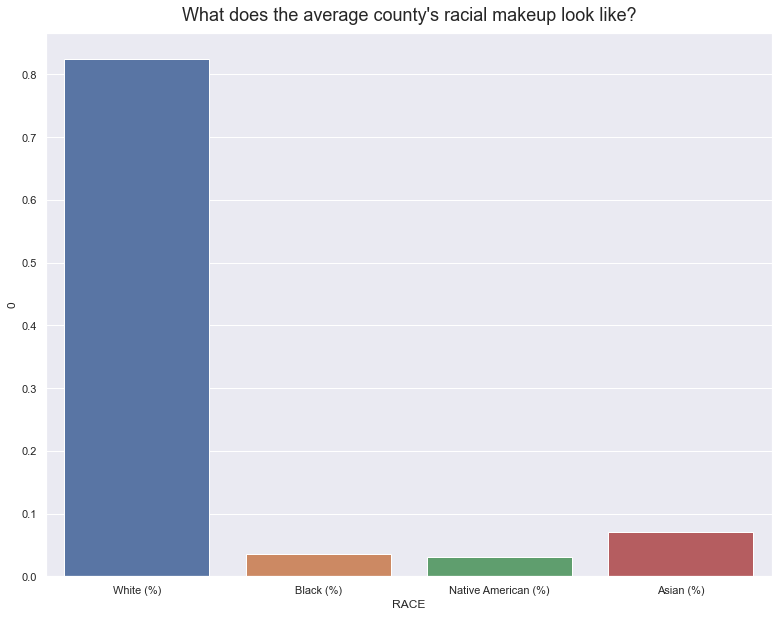

In [165]:
average_race = race_unstacked.mean().reset_index()
sns.barplot(x='RACE', y=0
            , data=average_race).set_title('What does the average county\'s racial makeup look like?'
                                             , fontdict={'fontsize':18}, pad=12)

## How does race affect the number of violent crimes commited?

In [120]:
race_vc = race_unstacked.merge(merge_vc_df, how='inner', on='CTYNAME')

<AxesSubplot:xlabel='Native American (%)', ylabel='Violent crime total'>

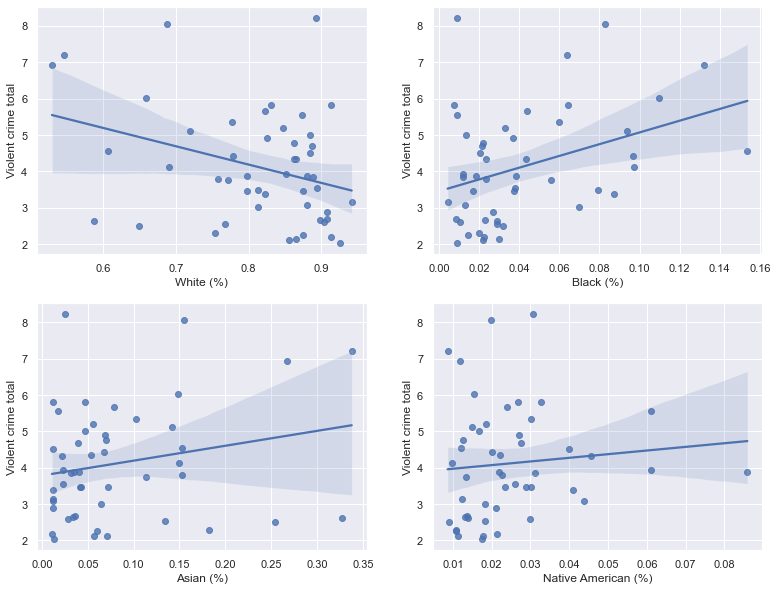

In [112]:
#Set figure to display four plots
fig, axs = plt.subplots(ncols=2,nrows=2)
#Make subplots
sns.regplot(x='White (%)', y='Violent crime total', data=race_vc, ax=axs[0][0])
sns.regplot(x='Black (%)', y='Violent crime total', data=race_vc, ax=axs[0][1])
sns.regplot(x='Asian (%)', y='Violent crime total', data=race_vc, ax=axs[1][0])
sns.regplot(x='Native American (%)', y='Violent crime total', data=race_vc, ax=axs[1][1])

## Does racial makeup change the types of crimes commited?

Text(0.5, 1.0, 'Race and Violent Crime Correlation Heatmap')

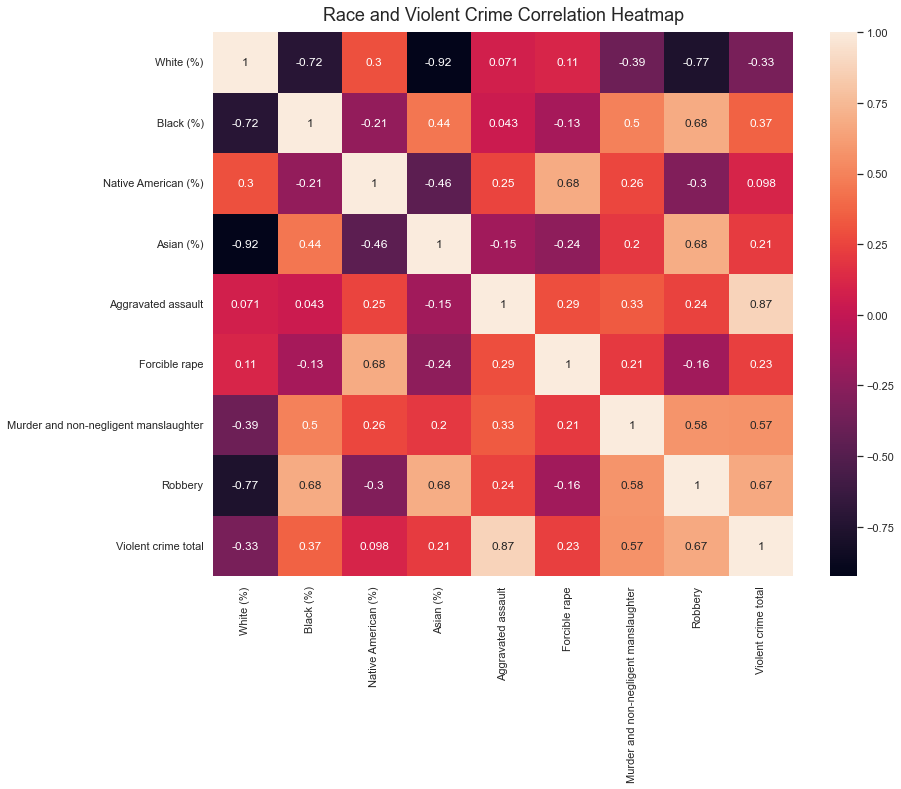

In [129]:
sns.heatmap(race_vc.corr(),annot=True).set_title('Race and Violent Crime Correlation Heatmap'
    , fontdict={'fontsize':18}
    , pad=12)